In [1]:
import numpy as np
import random
import time
import math
import random
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety

# Siguiente. Probar con el codigo real y ver el comportamiento. Especificamente ver si cambia mucho con la red! 

In [28]:
def select_new_ud (selected_ud, uds_disponiveis):
    uds_communities = [ud for ud in uds_disponiveis if ud != selected_ud]
    print(len(uds_communities))
    probabilidad = np.zeros(len(uds_communities))
    print(len(probabilidad))
    for i, obj in enumerate(uds_communities):
        if obj.community == selected_ud.community:
            # Asignar una probabilidad alta si el objeto pertenece a la misma comunidad
            probabilidad[i] = 1.0
        else:
            # Asignar una probabilidad uniforme si el objeto pertenece a una comunidad diferente
            probabilidad[i] = 1.0 / len(uds_communities)
    prob_normalized = probabilidad / np.sum(probabilidad)
    print(len(prob_normalized))
    choosen_ud = np.random.choice(uds_communities, p=prob_normalized)

    return prob_normalized, choosen_ud
uds_disponiveis = [ud for id_ud, ud in self.uds.items() if
                    id_ud != self.id and #Que a UD não seja self
                    not is_id_in_nested_lists(id_ud, [self.parentes[i] for i in [0, 1, 2, 3, 7]]) and # Que a UD não seja um parent
                    filho_e_idade(ud,1)[0] and #Que tenha um filho
                    abs(filho_e_idade(ud,1)[2] - idade_filha) <= 13 and #Que a diferença entre as idades não seja maior a 10
                  ]
select_new_ud(UD.uds[2], uds_disponiveis)

In [100]:
def select_new_ud(selected_ud, uds_disponiveis, scale_factor=1.0):
    if len(uds_disponiveis) == 0:
        return False

    # Extraer las comunidades de uds_disponiveis
    communities = np.array([ud.community for ud in uds_disponiveis])
    
    # Calcular probabilidades basadas en diferencias de comunidad
    probabilities = np.exp(-scale_factor * np.abs(communities - selected_ud.community))
    print(probabilities)
    print(len(probabilities))
    
    # Normalizar las probabilidades
    probabilities_normalized = probabilities / np.sum(probabilities)
    
    # Elegir una unidad basada en las probabilidades
    choosen_ud = np.random.choice(uds_disponiveis, p=probabilities_normalized)
    
    return choosen_ud

In [101]:
class UD:
    uds = {}
    def __init__(self, id_ud, community, activa):
        self.id = id_ud
        self.community = community
        self.uds[id_ud] = self
        self.active = activa

In [102]:
UD.uds = {}
iniciais = 40

comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
    instancias_ud.append(UD(id_ud, comunidades_disponibles.pop(0), random.choice([True, False])))
len(instancias_ud)

40

In [103]:
uds_disponiveis = [ud for ud in instancias_ud if ud.active == True]
for ud in uds_disponiveis:
    print(ud.id, ud.community)
len(uds_disponiveis)

1 1
2 1
4 1
6 1
7 1
8 1
9 1
11 2
12 2
16 2
17 2
20 2
23 3
24 3
25 3
26 3
27 3
30 3
31 4
33 4
34 4
35 4
38 4
40 4


24

In [106]:
UD.uds[11].active

True

In [108]:
select_new_ud(UD.uds[11], uds_disponiveis)

[0.36787944 0.36787944 0.36787944 0.36787944 0.36787944 0.36787944
 0.36787944 1.         1.         1.         1.         1.
 0.36787944 0.36787944 0.36787944 0.36787944 0.36787944 0.36787944
 0.13533528 0.13533528 0.13533528 0.13533528 0.13533528 0.13533528]
24


In [74]:
## CLase UD 
## Class with endogamy. In other words, UDs in this model belong to the same clan and the only criteria is 
# the incest rule and some probabilities related to distance. 
#This particular Class is used to set a limit in the number of UD on the model 0,1,2,3,7
###Relações na lista de parentes
#0. Pais do homem [0]
#1. Pais da mulher [1]
#2. Filhos [2]
#3. Avos [3] 
#4. Irmãos [4]
#5. Tios [5]
#6. Primos [6]
#7. Netos [7]
#8. Sobrinhos [8]
#9. Cassais passados [9]

### Filhos tem sexo e idade
#[sexo, idade]

class UD:
    #Dict de todas as UDs
    uds = {}

    def __init__(self, id_ud, media, community):
        self.id = id_ud
        self.parentes = [None]*10
        self.age = 1
        self.filhos = [None] * (np.random.poisson(media))
        self.uds[id_ud] = self
        self.activa = True 
        self.varieties = []
        self.community = community

    def ter_filho(self):
        # Tem espaco para ter filhos?, aleatoriamente para nao ter filhos todo ano. 
        if None in self.filhos and random.random() <= 0.3:
            # Coloca o filho no primeiro None
            for i in range(len(self.filhos)):
                if self.filhos[i] is None:
                    self.filhos[i] = [random.choice([0, 1]), 0] #[sexo, idade] e no sexo: 0 é feminino e 1 é masculino
                    break
        else:
            pass #print(f"Unidade {self.id} No tem para ter filhos!")

    def incrementar_idade(self):
        self.age += 1
        ## idade dos filhos no self.filhos
        for i in range(len(self.filhos)):
            if self.filhos[i] is not None:
                self.filhos[i][1] += 1
            else:
                break

    def death_probability(self, beta):
        alpha = 0.01
        delta = 0.00
        mortality_rate = alpha * math.exp(beta * (self.age)) + delta

        if random.random() < mortality_rate:
            self.activa = False

    def buscar_ud(self, media, matrilinear, locality): #metodo para buscar e reproducir.
        #Function to get a random couple
        def select_new_ud (selected_ud, uds_disponiveis):
            if len(uds_disponiveis) != 0: #If there are no possible mates
                #La verdad creo que es mas eficiente si no creo los ceros sino una con las comunidades y ahi opero sobre eso.
                probabilidad = np.zeros(len(uds_disponiveis))
                for i, obj in enumerate(uds_disponiveis):
                    if obj.community == selected_ud.community:
                        # Asignar una probabilidad alta si el objeto pertenece a la misma comunidad
                        probabilidad[i] = 1.0
                    else:
                        # Asignar una probabilidad uniforme si el objeto pertenece a una comunidad diferente
                        probabilidad[i] = 1.0 / len(uds_disponiveis)
                prob_normalized = probabilidad / np.sum(probabilidad)
                #print(len(prob_normalized))
                choosen_ud = np.random.choice(uds_disponiveis, p=prob_normalized)
                return choosen_ud
            else:
                return False
        
        #Função para facilitar a busqueda de ids dentro da lista de parentes.
        def is_id_in_nested_lists(id_ud, nested_list):
            if id_ud in nested_list:
                return True
            for sublist in nested_list:
                if isinstance(sublist, list) and is_id_in_nested_lists(id_ud, sublist):
                    return True
            return False
        
        #Função para facilitar a busqueda de filhos segundo o sexo
        def filho_e_idade(self, sexo):
            for i in range(len(self.filhos)):
                filho = self.filhos[i]
                #Se o sexo é o que estamos procurando e se a idade é permitida para o casamento
                if filho is not None and filho[0] == sexo and filho[1] > 13:
                    return (True, i, filho[1])  # True, a posição e a idade

            return (False, None, None)  # False, None e None
        
        filha_disponivel, posição_filha, idade_filha = filho_e_idade(self, 0) #Se a unidade tem uma filha disponivel para procurar esposa
        if filha_disponivel:
            uds_disponiveis = [ud for id_ud, ud in self.uds.items() if
                    id_ud != self.id and #Que a UD não seja self
                    not is_id_in_nested_lists(id_ud, [self.parentes[i] for i in [0, 1, 2, 3, 7]]) and # Que a UD não seja um parent
                    filho_e_idade(ud,1)[0] and #Que tenha um filho
                    abs(filho_e_idade(ud,1)[2] - idade_filha) <= 13 #Que a diferença entre as idades não seja maior a 10
                      ]
            new_couple = select_new_ud(self, uds_disponiveis)
            
            if new_couple:
                cassal_id = new_couple.id
                filho_disponivel, posição_filho, idade_filho = filho_e_idade(UD.uds[cassal_id], 1)
                #print(filho_disponivel, posição_filho, idade_filho)
                #Agregar no espaço de casais passados [9]
                if self.parentes[9] is None: 
                    # Se a lista não existe, cria uma nova com esse id
                    self.parentes[9] = [cassal_id]
                else:
                    # Se a lista já existe, só agrega o id
                    self.parentes[9].append(cassal_id)
                if self.uds[cassal_id].parentes[9] is None: 
                    # Se a lista não existe, cria uma nova com esse id
                    self.uds[cassal_id].parentes[9] = [self.id]
                else:
                    # Se a lista já existe, só agrega o id
                    self.uds[cassal_id].parentes[9].append(self.id)   

                #### Criar um novo filho e asignar os parentes
                novo_id = max(self.uds) + 1
                if locality == True:
                    novo_nodo = UD(novo_id, media, self.uds[cassal_id].community)
                else:
                    novo_nodo = UD(novo_id, media, self.community)
                novo_nodo.parentes[0] = self.id   # Pais do homem [0]
                novo_nodo.parentes[1] = cassal_id # Pais da mulher [1] 
                
                #####Avos[3]
                # IDs do pai
                padre_self = self.parentes[0]
                madre_self = self.parentes[1]
                # IDs da mae
                pareja = self.uds[cassal_id]
                padre_pareja = pareja.parentes[0]
                madre_pareja = pareja.parentes[1]
                # Agregar os pais dos pais do novo_nodo como avos
                novo_nodo.parentes[3] = [valor for valor in [padre_self, madre_self, padre_pareja, madre_pareja] if valor is not None]
                ###Proceso de atualização: netos
                # Se novo_nodo tem avos 
                if None not in novo_nodo.parentes[3]:
                    # IDs dos avos de novo_nodo
                    abuelos_ids = novo_nodo.parentes[3]
                # Agregar aos avos o novo_nodo como neto.
                for abuelo_id in abuelos_ids:
                    if abuelo_id is not None:
                        abuelo = self.uds[abuelo_id]
                        if abuelo.parentes[7] is None:
                            abuelo.parentes[7] = [novo_nodo.id]
                        else:
                            abuelo.parentes[7].append(novo_nodo.id)
                
                #### Irmãos [4]
                hermanos_ids = []
                if novo_nodo.parentes[0] is not None:
                    # Filhos dos pais do novo_nodo (irmãos por parte do pai)
                    padre_nuevo = self.uds[novo_nodo.parentes[0]]
                    if padre_nuevo.parentes[2] is not None:
                        hermanos_ids.extend(padre_nuevo.parentes[2])
                if novo_nodo.parentes[1] is not None:
                    # Filhos dos pais do novo_nodo (irmãos por parte da mãe)
                    madre_nuevo = self.uds[novo_nodo.parentes[1]]
                    if madre_nuevo.parentes[2] is not None:
                        hermanos_ids.extend(madre_nuevo.parentes[2])
                # Não ter o id de novo_nodo como irmão
                hermanos_ids = [hermano_id for hermano_id in hermanos_ids if hermano_id != novo_nodo.id]
                # Agregar aos irmãos de novo_nodo
                novo_nodo.parentes[4] = hermanos_ids
                
                ##Proceso de atualização: irmãos
                # ID de novo_nodo nos irmãos existentes
                for hermano_id in hermanos_ids:
                    hermano = self.uds[hermano_id]
                    if hermano.parentes[4] is None:
                        hermano.parentes[4] = [novo_nodo.id]
                    else:
                        hermano.parentes[4].append(novo_nodo.id)
                #####Tios[5]
                # IDs dos avos de novo_nodo
                abuelos_ids = novo_nodo.parentes[3]
                
                # Iterar nos avos para encontrar os tios
                tios_ids = [hermano_id for abuelo_id in abuelos_ids if abuelo_id is not None
                            for hermano_id in self.uds[abuelo_id].parentes[2] if hermano_id is not None
                            if hermano_id != novo_nodo.parentes[0] and hermano_id != novo_nodo.parentes[1]]
                # Agregar os IDs dos tios no novo_nodo
                novo_nodo.parentes[5] = tios_ids
                
                ##Proceso de atualização: sobrinhos
                # Actualizar os sobrinhos dos tios.
                for tio_id in tios_ids:
                    if tio_id is not None:
                        tio = self.uds[tio_id]
                        if tio.parentes[8] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            tio.parentes[8] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            tio.parentes[8].append(novo_nodo.id)
                
                #### Primos[6]
                primos_ids = [primo_id for tio_id in tios_ids if tio_id is not None
                            for tio in [self.uds[tio_id]] if tio.parentes[2] is not None
                            for primo_id in tio.parentes[2] if primo_id is not None and primo_id != novo_nodo.id]

                # Agregar os IDs dos primos no novo_nodo
                novo_nodo.parentes[6] = primos_ids
                
                ##Proceso de atualização: sobrinhos
                for primo_id in primos_ids:
                    if primo_id is not None:
                        primo = self.uds[primo_id]
                        if primo.parentes[6] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            primo.parentes[6] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            primo.parentes[6].append(novo_nodo.id)
                            
                ####Sobrinos[8] 
                sobrinos_ids = [sobrino_id for hermano_id in hermanos_ids if hermano_id is not None
                                for hermano in [self.uds[hermano_id]] if hermano.parentes[2] is not None
                                for sobrino_id in hermano.parentes[2] if sobrino_id is not None and sobrino_id != novo_nodo.id]

                # Agregar os IDs dos sobrinhos no novo_nodo
                novo_nodo.parentes[8] = sobrinos_ids
                
                ##Proceso de atualização: tios
                for sobrino_id in sobrinos_ids:
                    if sobrino_id is not None:
                        sobrino = self.uds[sobrino_id]
                        if sobrino.parentes[5] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            sobrino.parentes[5] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            sobrino.parentes[5].append(novo_nodo.id)
                            
                            
                ### Eliminar os filhos utilizados no processo
                self.filhos.pop(posição_filha)
                self.uds[cassal_id].filhos.pop(posição_filho)
                
                # colcoar o novo filho dos pais
                if self.parentes[2] is None:
                    self.parentes[2] = [novo_id]
                else:
                    self.parentes[2].append(novo_id)
                if self.uds[cassal_id].parentes[2] is None:
                    self.uds[cassal_id].parentes[2] = [novo_id]
                else:
                    self.uds[cassal_id].parentes[2].append(novo_id)
                
                # Herdar sementes
                novo_nodo.heredar(matrilinear)
                
                #return None
            else:
                #print(f"UD {self.id} não achou cassal.")
                return None

        else:
            #print(f"UD {self.id} não achou ninguem")
            return None

    def heredar(self, matrilinear): #Metodo da herança de sementes.
        vm = UD.uds[self.parentes[1]].varieties
        vp = UD.uds[self.parentes[0]].varieties
        heredar_mae = math.ceil((matrilinear * len(vm))/100)
        heredar_pai = math.ceil(((100-matrilinear) * len(vp))/100)
        vari_mae = vm[0:heredar_mae] #as primeiras variedades
        vari_pai = vp[0:heredar_pai] #as primeiras variedades
        # Mutacao
#        if random.random() < 0.001:
#            # uma aleatoria
#            variedad_a_mutar = random.choice(vari_mae + vari_pai)
#            # mutacao
#            variedad_a_mutar.mutation()

        # Heredar as variedades
        self.varieties.extend(vari_mae + vari_pai)

In [2]:
## CLase UD ENDOGAMY AND DISTANCE PENALTY
## Class with endogamy. In other words, UDs in this model belong to the same clan and the only criteria is 
# the incest rule and some probabilities related to distance. 
# With distane "penalty"
#This particular Class is used to set a limit in the number of UD on the model 0,1,2,3,4,5,7,8
###Relações na lista de parentes
#0. Pais do homem [0]
#1. Pais da mulher [1]
#2. Filhos [2]
#3. Avos [3] 
#4. Irmãos [4]
#5. Tios [5]
#6. Primos [6]
#7. Netos [7]
#8. Sobrinhos [8]
#9. Cassais passados [9]

### Filhos tem sexo e idade
#[sexo, idade]

class UD_endogamy:
    #Dict de todas as UDs
    uds = {}

    def __init__(self, id_ud, media, community):
        self.id = id_ud
        self.parentes = [None]*10
        self.age = 1
        self.filhos = [None] * (np.random.poisson(media))
        self.uds[id_ud] = self
        self.activa = True 
        self.varieties = []
        self.community = community

    def ter_filho(self):
        # Tem espaco para ter filhos?, aleatoriamente para nao ter filhos todo ano. 
        if None in self.filhos and random.random() <= 0.3:
            # Coloca o filho no primeiro None
            for i in range(len(self.filhos)):
                if self.filhos[i] is None:
                    self.filhos[i] = [random.choice([0, 1]), 0] #[sexo, idade] e no sexo: 0 é feminino e 1 é masculino
                    break
        else:
            pass #print(f"Unidade {self.id} No tem para ter filhos!")

    def incrementar_idade(self):
        self.age += 1
        ## idade dos filhos no self.filhos
        for i in range(len(self.filhos)):
            if self.filhos[i] is not None:
                self.filhos[i][1] += 1
            else:
                break

    def death_probability(self, beta):
        alpha = 0.01
        delta = 0.00
        mortality_rate = alpha * math.exp(beta * (self.age)) + delta

        if random.random() < mortality_rate:
            self.activa = False

    def buscar_ud(self, media, matrilinear, locality): #metodo para buscar e reproducir.
        #Function to get a random couple
        def select_new_ud(selected_ud, uds_disponiveis, scale_factor=1.0):
            if len(uds_disponiveis) == 0:
                return False
            # Get communities
            communities = np.array([ud.community for ud in uds_disponiveis])
            # Probabilities
            probabilities = np.exp(-scale_factor * np.abs(communities - selected_ud.community))
            # Normalice
            probabilities_normalized = probabilities / np.sum(probabilities)
            # Choose
            choosen_ud = np.random.choice(uds_disponiveis, p=probabilities_normalized)

            return choosen_ud
        
        #Função para facilitar a busqueda de ids dentro da lista de parentes.
        def is_id_in_nested_lists(id_ud, nested_list):
            if id_ud in nested_list:
                return True
            for sublist in nested_list:
                if isinstance(sublist, list) and is_id_in_nested_lists(id_ud, sublist):
                    return True
            return False
        
        #Função para facilitar a busqueda de filhos segundo o sexo
        def filho_e_idade(self, sexo):
            for i in range(len(self.filhos)):
                filho = self.filhos[i]
                #Se o sexo é o que estamos procurando e se a idade é permitida para o casamento
                if filho is not None and filho[0] == sexo and filho[1] > 13:
                    return (True, i, filho[1])  # True, a posição e a idade

            return (False, None, None)  # False, None e None
        
        filha_disponivel, posição_filha, idade_filha = filho_e_idade(self, 0) #Se a unidade tem uma filha disponivel para procurar esposa
        if filha_disponivel:
            uds_disponiveis = [ud for id_ud, ud in self.uds.items() if
                    id_ud != self.id and #Que a UD não seja self
                    not is_id_in_nested_lists(id_ud, [self.parentes[i] for i in [0, 1, 2, 3, 4, 5, 7, 8]]) and # Que a UD não seja um parent
                    filho_e_idade(ud,1)[0] and #Que tenha um filho
                    abs(filho_e_idade(ud,1)[2] - idade_filha) <= 13 #Que a diferença entre as idades não seja maior a 10
                      ]
            new_couple = select_new_ud(self, uds_disponiveis)
            
            if new_couple:
                cassal_id = new_couple.id
                filho_disponivel, posição_filho, idade_filho = filho_e_idade(UD.uds[cassal_id], 1)
                #print(filho_disponivel, posição_filho, idade_filho)
                #Agregar no espaço de casais passados [9]
                if self.parentes[9] is None: 
                    # Se a lista não existe, cria uma nova com esse id
                    self.parentes[9] = [cassal_id]
                else:
                    # Se a lista já existe, só agrega o id
                    self.parentes[9].append(cassal_id)
                if self.uds[cassal_id].parentes[9] is None: 
                    # Se a lista não existe, cria uma nova com esse id
                    self.uds[cassal_id].parentes[9] = [self.id]
                else:
                    # Se a lista já existe, só agrega o id
                    self.uds[cassal_id].parentes[9].append(self.id)   

                #### Criar um novo filho e asignar os parentes
                novo_id = max(self.uds) + 1
                if locality == True:
                    novo_nodo = UD(novo_id, media, self.uds[cassal_id].community)
                else:
                    novo_nodo = UD(novo_id, media, self.community)
                novo_nodo.parentes[0] = self.id   # Pais do homem [0]
                novo_nodo.parentes[1] = cassal_id # Pais da mulher [1] 
                
                #####Avos[3]
                # IDs do pai
                padre_self = self.parentes[0]
                madre_self = self.parentes[1]
                # IDs da mae
                pareja = self.uds[cassal_id]
                padre_pareja = pareja.parentes[0]
                madre_pareja = pareja.parentes[1]
                # Agregar os pais dos pais do novo_nodo como avos
                novo_nodo.parentes[3] = [valor for valor in [padre_self, madre_self, padre_pareja, madre_pareja] if valor is not None]
                ###Proceso de atualização: netos
                # Se novo_nodo tem avos 
                if None not in novo_nodo.parentes[3]:
                    # IDs dos avos de novo_nodo
                    abuelos_ids = novo_nodo.parentes[3]
                # Agregar aos avos o novo_nodo como neto.
                for abuelo_id in abuelos_ids:
                    if abuelo_id is not None:
                        abuelo = self.uds[abuelo_id]
                        if abuelo.parentes[7] is None:
                            abuelo.parentes[7] = [novo_nodo.id]
                        else:
                            abuelo.parentes[7].append(novo_nodo.id)
                
                #### Irmãos [4]
                hermanos_ids = []
                if novo_nodo.parentes[0] is not None:
                    # Filhos dos pais do novo_nodo (irmãos por parte do pai)
                    padre_nuevo = self.uds[novo_nodo.parentes[0]]
                    if padre_nuevo.parentes[2] is not None:
                        hermanos_ids.extend(padre_nuevo.parentes[2])
                if novo_nodo.parentes[1] is not None:
                    # Filhos dos pais do novo_nodo (irmãos por parte da mãe)
                    madre_nuevo = self.uds[novo_nodo.parentes[1]]
                    if madre_nuevo.parentes[2] is not None:
                        hermanos_ids.extend(madre_nuevo.parentes[2])
                # Não ter o id de novo_nodo como irmão
                hermanos_ids = [hermano_id for hermano_id in hermanos_ids if hermano_id != novo_nodo.id]
                # Agregar aos irmãos de novo_nodo
                novo_nodo.parentes[4] = hermanos_ids
                
                ##Proceso de atualização: irmãos
                # ID de novo_nodo nos irmãos existentes
                for hermano_id in hermanos_ids:
                    hermano = self.uds[hermano_id]
                    if hermano.parentes[4] is None:
                        hermano.parentes[4] = [novo_nodo.id]
                    else:
                        hermano.parentes[4].append(novo_nodo.id)
                #####Tios[5]
                # IDs dos avos de novo_nodo
                abuelos_ids = novo_nodo.parentes[3]
                
                # Iterar nos avos para encontrar os tios
                tios_ids = [hermano_id for abuelo_id in abuelos_ids if abuelo_id is not None
                            for hermano_id in self.uds[abuelo_id].parentes[2] if hermano_id is not None
                            if hermano_id != novo_nodo.parentes[0] and hermano_id != novo_nodo.parentes[1]]
                # Agregar os IDs dos tios no novo_nodo
                novo_nodo.parentes[5] = tios_ids
                
                ##Proceso de atualização: sobrinhos
                # Actualizar os sobrinhos dos tios.
                for tio_id in tios_ids:
                    if tio_id is not None:
                        tio = self.uds[tio_id]
                        if tio.parentes[8] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            tio.parentes[8] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            tio.parentes[8].append(novo_nodo.id)
                
                #### Primos[6]
                primos_ids = [primo_id for tio_id in tios_ids if tio_id is not None
                            for tio in [self.uds[tio_id]] if tio.parentes[2] is not None
                            for primo_id in tio.parentes[2] if primo_id is not None and primo_id != novo_nodo.id]

                # Agregar os IDs dos primos no novo_nodo
                novo_nodo.parentes[6] = primos_ids
                
                ##Proceso de atualização: sobrinhos
                for primo_id in primos_ids:
                    if primo_id is not None:
                        primo = self.uds[primo_id]
                        if primo.parentes[6] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            primo.parentes[6] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            primo.parentes[6].append(novo_nodo.id)
                            
                ####Sobrinos[8] 
                sobrinos_ids = [sobrino_id for hermano_id in hermanos_ids if hermano_id is not None
                                for hermano in [self.uds[hermano_id]] if hermano.parentes[2] is not None
                                for sobrino_id in hermano.parentes[2] if sobrino_id is not None and sobrino_id != novo_nodo.id]

                # Agregar os IDs dos sobrinhos no novo_nodo
                novo_nodo.parentes[8] = sobrinos_ids
                
                ##Proceso de atualização: tios
                for sobrino_id in sobrinos_ids:
                    if sobrino_id is not None:
                        sobrino = self.uds[sobrino_id]
                        if sobrino.parentes[5] is None:
                            # Se não existe, cria lisa com o id de novo_nodo
                            sobrino.parentes[5] = [novo_nodo.id]
                        else:
                            # Se existe, agregar o id de novo_nodo
                            sobrino.parentes[5].append(novo_nodo.id)
                            
                            
                ### Eliminar os filhos utilizados no processo
                self.filhos.pop(posição_filha)
                self.uds[cassal_id].filhos.pop(posição_filho)
                
                # colcoar o novo filho dos pais
                if self.parentes[2] is None:
                    self.parentes[2] = [novo_id]
                else:
                    self.parentes[2].append(novo_id)
                if self.uds[cassal_id].parentes[2] is None:
                    self.uds[cassal_id].parentes[2] = [novo_id]
                else:
                    self.uds[cassal_id].parentes[2].append(novo_id)
                
                # Herdar sementes
                novo_nodo.heredar(matrilinear)
                
                #return None
            else:
                #print(f"UD {self.id} não achou cassal.")
                return None

        else:
            #print(f"UD {self.id} não achou ninguem")
            return None

    def heredar(self, matrilinear): #Metodo da herança de sementes.
        vm = UD.uds[self.parentes[1]].varieties
        vp = UD.uds[self.parentes[0]].varieties
        heredar_mae = math.ceil((matrilinear * len(vm))/100)
        heredar_pai = math.ceil(((100-matrilinear) * len(vp))/100)
        vari_mae = vm[0:heredar_mae] #as primeiras variedades
        vari_pai = vp[0:heredar_pai] #as primeiras variedades
        self.varieties.extend(vari_mae + vari_pai)

In [ ]:
#Lista de objetos que si son considerados
uds_disponiveis = [ud for id_ud, ud in self.uds.items() if 
                    ud.activa == True and #Que a UD esteja viva.
                    id_ud != self.id and #Que a UD não seja self
                    not is_id_in_nested_lists(id_ud, [self.parentes[i] for i in [0,1,2,3,4,5,7,8]]) and # Que a UD não seja um parent
                    filho_e_idade(ud,1)[0] and #Que tenha um filho
                    abs(filho_e_idade(ud,1)[2] - idade_filha) <= 13 and #Que a diferença entre as idades não seja maior a 10
                  ]

tamos en tiempo 100 con vivas 72
tamos en tiempo 200 con vivas 157


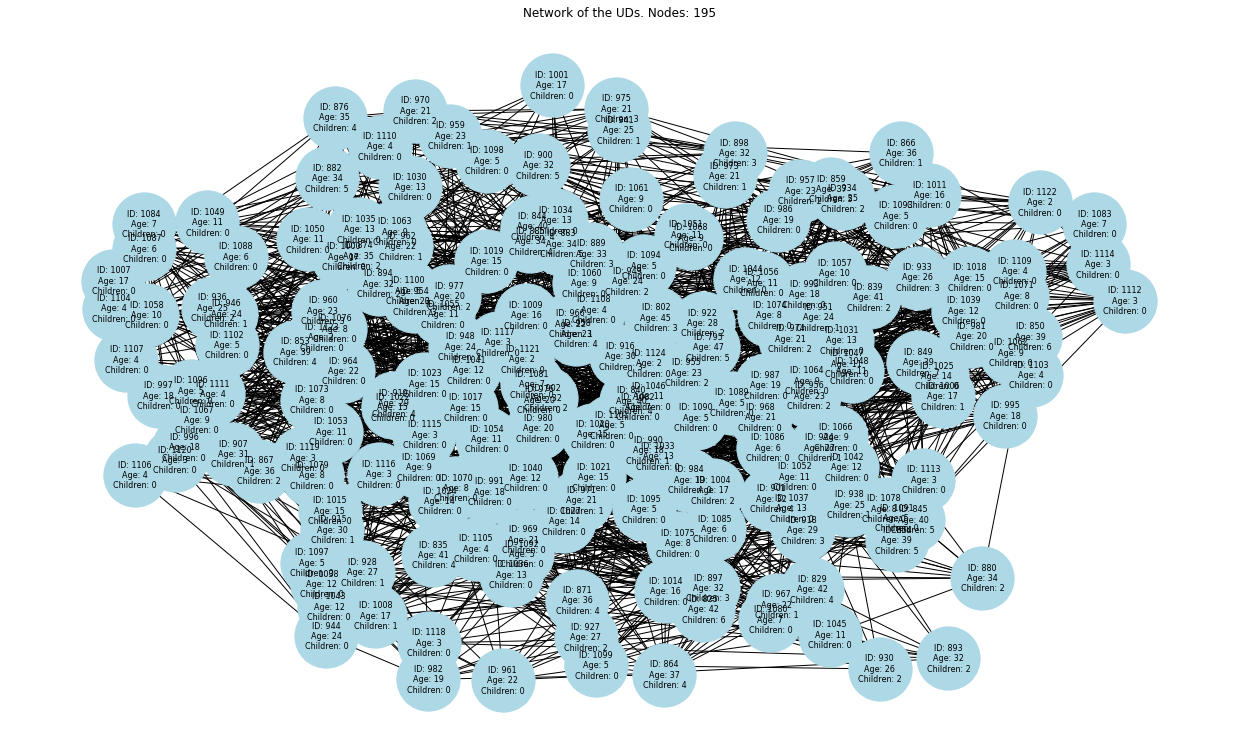

Betweenness Centrality:
{1052: 0.02059750107112185, 916: 0.018763087243442625, 924: 0.015012429106005962, 1123: 0.014641675004431285, 1069: 0.014480241329845026, 980: 0.013614451670542886, 1020: 0.01269998839290748, 986: 0.012688479851629884, 882: 0.012616495937773005, 991: 0.01204614697083744}

Closeness Centrality:
{1052: 0.5480225988700564, 1124: 0.5434173669467787, 924: 0.5403899721448467, 1042: 0.5373961218836565, 1086: 0.5300546448087432, 1040: 0.5286103542234333, 971: 0.5271739130434783, 980: 0.5271739130434783, 1069: 0.5271739130434783, 916: 0.5271739130434783}

Degree Centrality:
{1052: 0.2422680412371134, 1042: 0.211340206185567, 1124: 0.211340206185567, 933: 0.20103092783505155, 916: 0.20103092783505155, 1047: 0.20103092783505155, 980: 0.1958762886597938, 924: 0.19072164948453607, 1086: 0.19072164948453607, 960: 0.18556701030927836}

Eigenvector Centrality:
{1052: 0.17325689586055806, 1124: 0.16432959949291123, 1042: 0.16237309852042012, 1086: 0.15422565264038923, 1047: 0.14

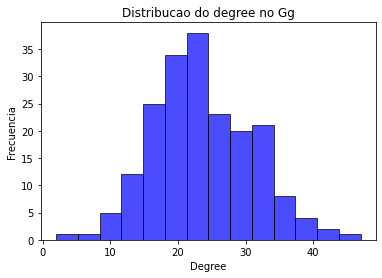

Densidade: 0.122548242135871
Número de nós: 195
Número de aristas: 2318
Diámetro: 4
Transitividade: 0.43817371475953565
Average shorthest path: 2.1214380121596617
Coeficiente de Clustering Promedio (cluster maior): 0.4516505054755419
----------------------------


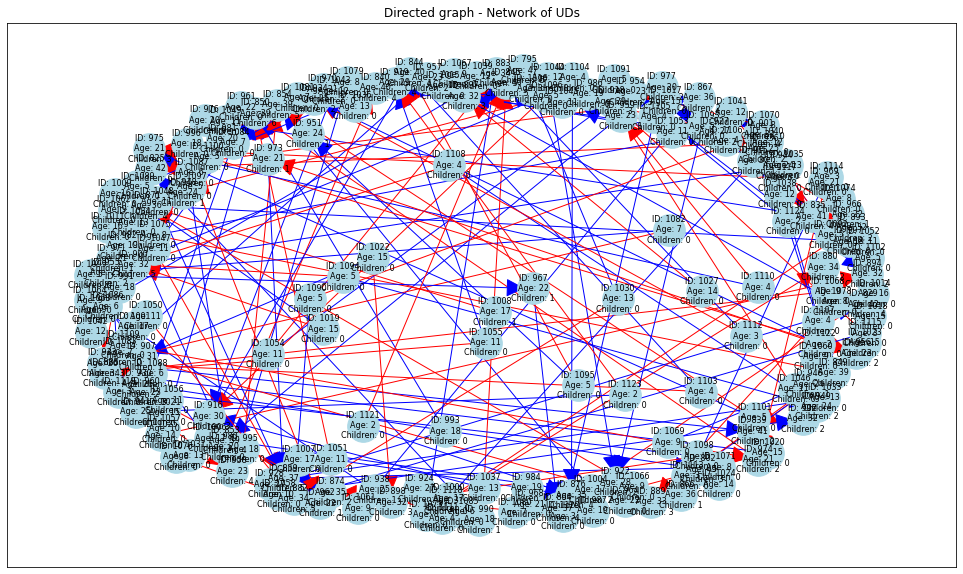

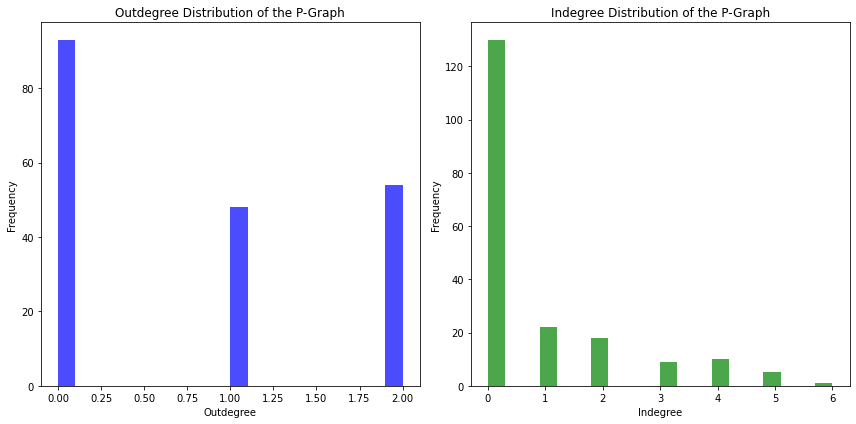

tamos en tiempo 300 con vivas 207
tamos en tiempo 400 con vivas 419


KeyboardInterrupt: 

In [3]:
#Original
iniciais = 40 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 501 #steps of the simulation

#### Initialization
## Comunidades
UD.uds = {}
comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
    instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
## Variedades y repartirlas entre las comunidades
for id_ud, ud in UD.uds.items():
    for _ in range(5):
        ud.varieties.append(Variety())
    #### Simulation
vivas = [int(iniciais)]
for i in range (1, (t)):
    uds_copy = dict(UD.uds) #As UDs existentes no tempo n
    any_ud_active = False # Flag to see if the simulation went to extintion
    for id_ud, ud in uds_copy.items():
        if ud.activa == True:
            any_ud_active = True
            ud.ter_filho()
            ud.buscar_ud(media, 50, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
    if not any_ud_active:
        print("acabo")
        break
    if i % 250 == 0:
        create_vis_geral(uds_copy, True)
        p_graph(uds_copy, True)
     # Collecting data
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
    vivas.append(viv)
    #mortas.append(mort)
    #tempo.append(t)
    if i%100 == 0:
        print(f"tamos en tiempo {i} con vivas {viv}")
print(len([ud for id, ud in uds_copy.items() if ud.activa]))

tamos en tiempo 100 con vivas 50
tamos en tiempo 200 con vivas 77


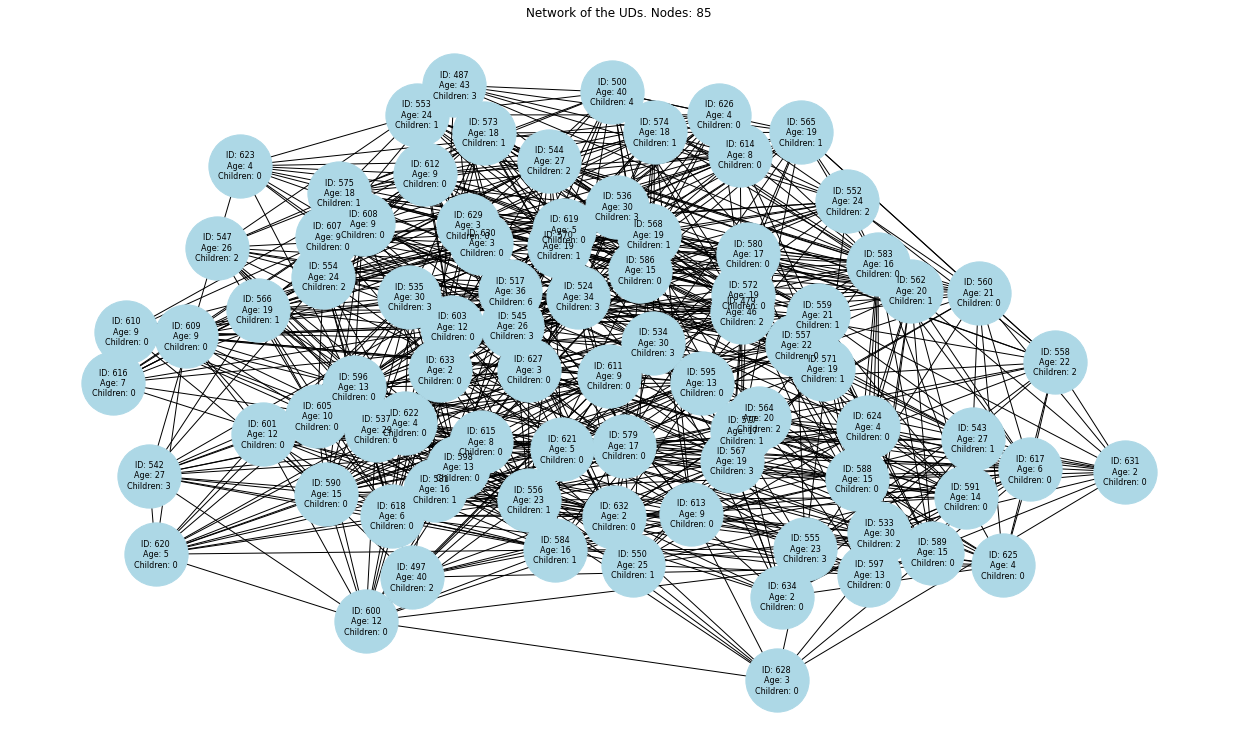

Betweenness Centrality:
{586: 0.032784809613229986, 556: 0.02990787538671164, 621: 0.028140466115763704, 627: 0.02565451515643227, 524: 0.02474780392204314, 618: 0.02402201388901924, 596: 0.02355459988826371, 583: 0.022600600959504606, 603: 0.022294673162485047, 584: 0.01669032948800131}

Closeness Centrality:
{586: 0.6131386861313869, 596: 0.6131386861313869, 605: 0.6131386861313869, 556: 0.6086956521739131, 524: 0.60431654676259, 621: 0.6, 627: 0.5915492957746479, 618: 0.5915492957746479, 583: 0.5874125874125874, 535: 0.5833333333333334}

Degree Centrality:
{586: 0.369047619047619, 596: 0.369047619047619, 605: 0.369047619047619, 556: 0.3571428571428571, 524: 0.34523809523809523, 621: 0.34523809523809523, 583: 0.3214285714285714, 590: 0.30952380952380953, 627: 0.30952380952380953, 618: 0.30952380952380953}

Eigenvector Centrality:
{605: 0.19655244665144564, 596: 0.19060571140599625, 586: 0.17426536712641583, 556: 0.17339008228732994, 590: 0.16357584406943346, 524: 0.16283650751569237,

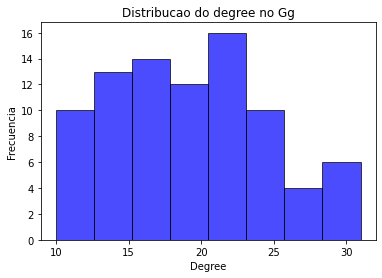

Densidade: 0.2288515406162465
Número de nós: 85
Número de aristas: 817
Diámetro: 3
Transitividade: 0.48234856930509107
Average shorthest path: 1.8322128851540616
Coeficiente de Clustering Promedio (cluster maior): 0.504643313468432
----------------------------


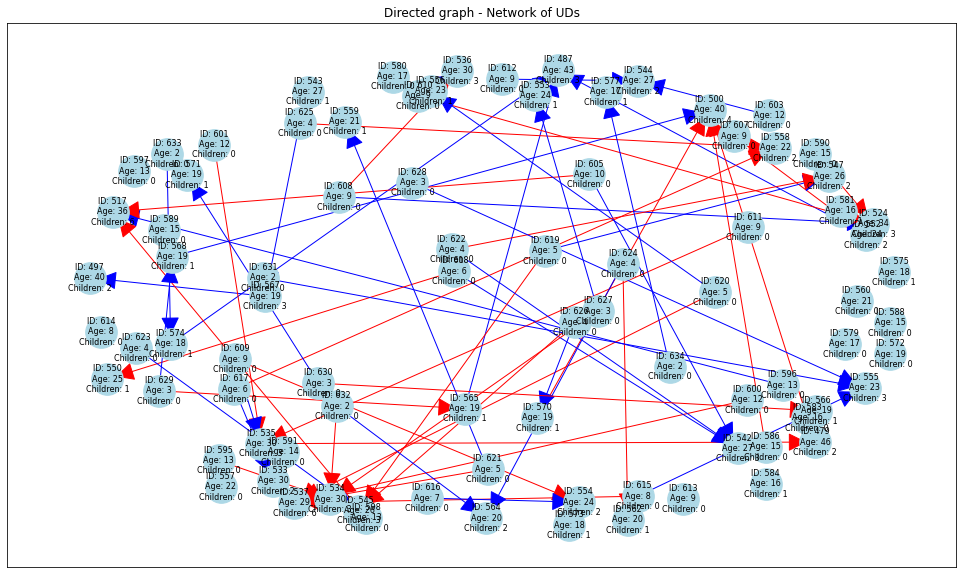

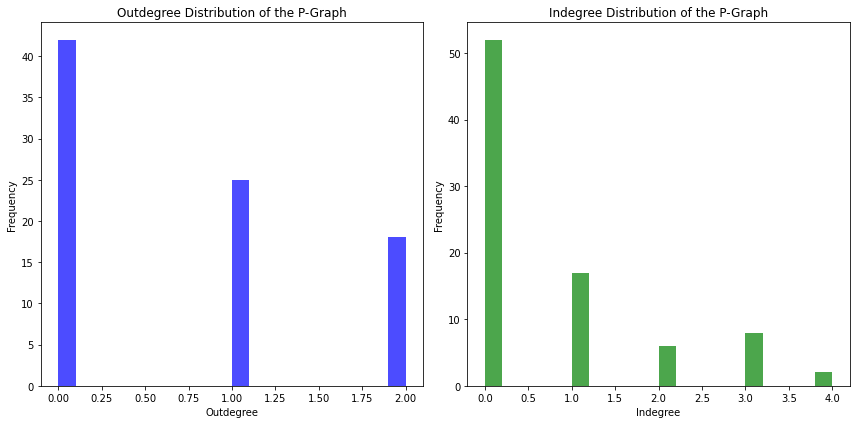

tamos en tiempo 300 con vivas 87
tamos en tiempo 400 con vivas 122


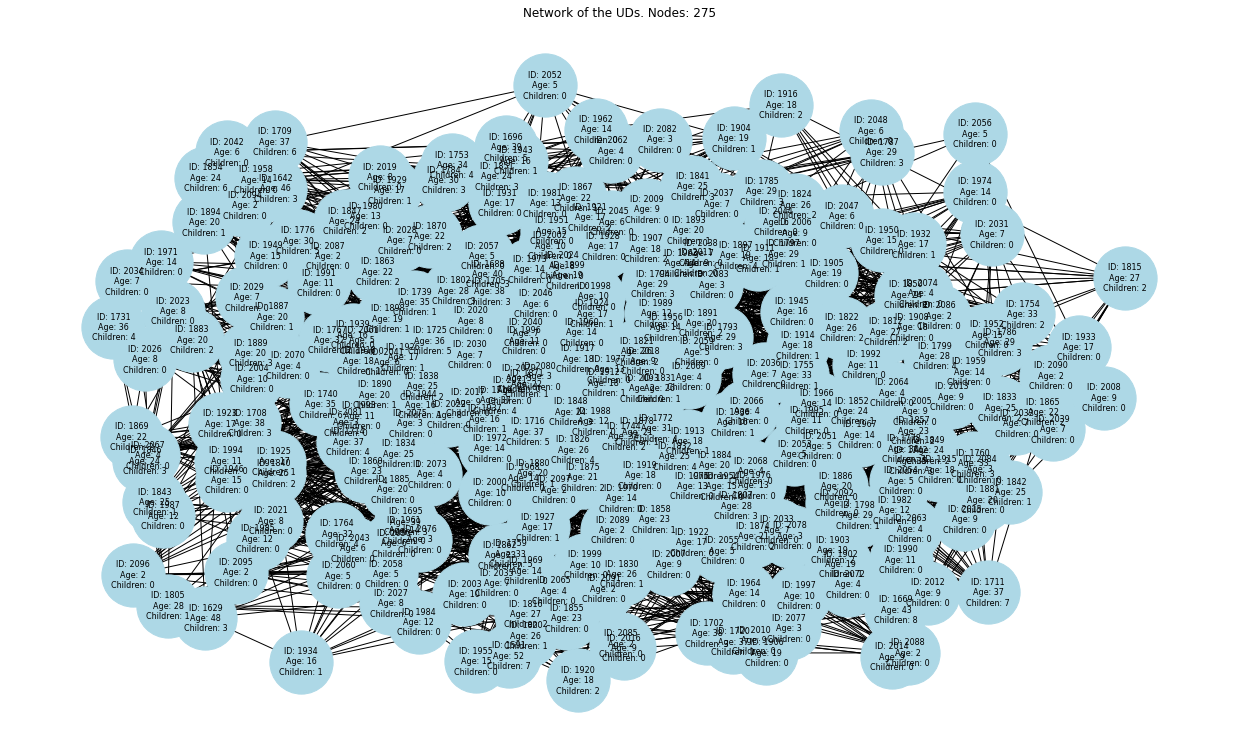

Betweenness Centrality:
{1891: 0.015621057388868534, 1919: 0.014114827645436704, 1841: 0.013549943517432059, 1917: 0.011805968165043916, 1960: 0.011649412526346612, 1848: 0.011255906070483305, 1964: 0.01103378268704654, 1907: 0.010237145653070422, 1719: 0.010208394759508651, 1995: 0.010007230738479618}

Closeness Centrality:
{1960: 0.5219047619047619, 1891: 0.5179584120982986, 1917: 0.5169811320754717, 1964: 0.5160075329566854, 2007: 0.5121495327102804, 1936: 0.5111940298507462, 1954: 0.5111940298507462, 1848: 0.5083487940630798, 2051: 0.5083487940630798, 1919: 0.5083487940630798}

Degree Centrality:
{1995: 0.16058394160583941, 1960: 0.16058394160583941, 1919: 0.15693430656934307, 1848: 0.15328467153284672, 2007: 0.15328467153284672, 1891: 0.14963503649635035, 1899: 0.14963503649635035, 1898: 0.14963503649635035, 1917: 0.14963503649635035, 1964: 0.145985401459854}

Eigenvector Centrality:
{2007: 0.13425287559095647, 1917: 0.12664583294512682, 1995: 0.12606227241709522, 1954: 0.12262656

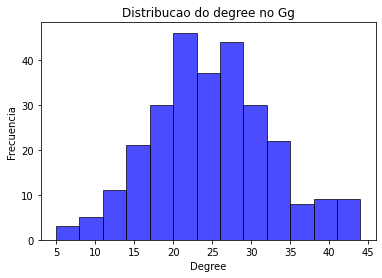

Densidade: 0.08966157929661579
Número de nós: 275
Número de aristas: 3378
Diámetro: 4
Transitividade: 0.3982083019900157
Average shorthest path: 2.1836496350364962
Coeficiente de Clustering Promedio (cluster maior): 0.4107516035176119
----------------------------


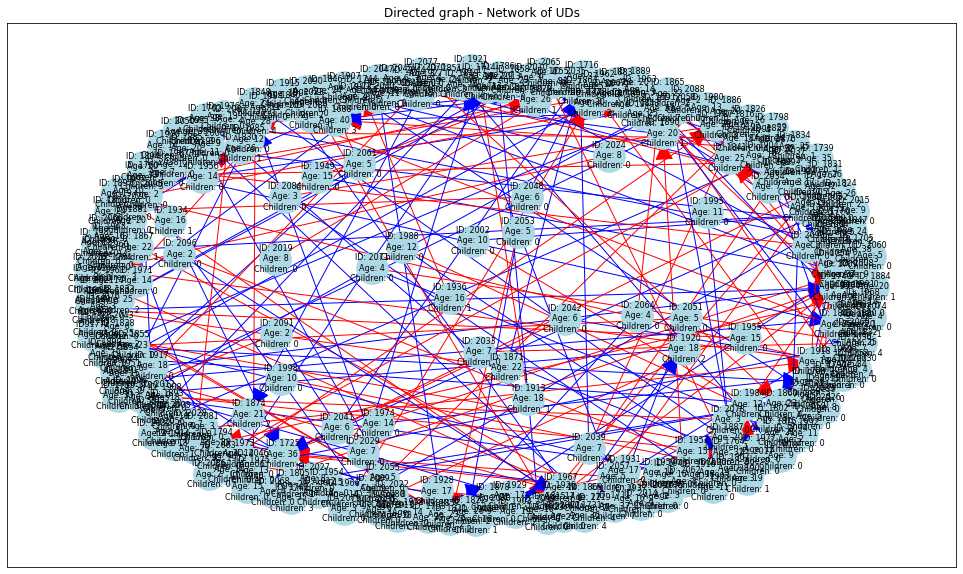

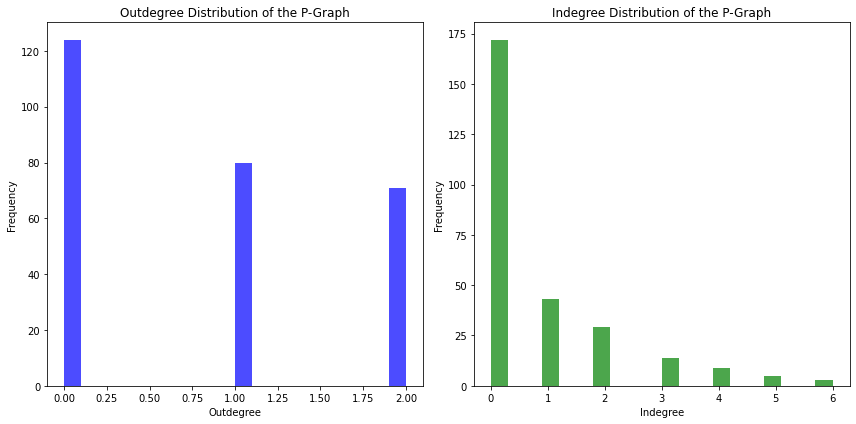

tamos en tiempo 500 con vivas 275
275


In [4]:
### Para cambiar
iniciais = 40 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 501 #steps of the simulation
#### Initialization
## Comunidades
UD.uds = {}
comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
    instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
## Variedades y repartirlas entre las comunidades
for id_ud, ud in UD.uds.items():
    for _ in range(5):
        ud.varieties.append(Variety())     
    #### Simulation
original_media = media
vivas = [int(iniciais)]
for i in range(1, t):
    uds_copy = {id_ud: ud for id_ud, ud in UD.uds.items() if ud.activa}
    # if not alive
    if not uds_copy:
        print("acabo")
        break
    for id_ud, ud in uds_copy.items():
        ud.ter_filho()
        ud.buscar_ud(media, 50, True)
        ud.incrementar_idade()
        ud.death_probability(prob_morte)
    if i % 250 == 0:
        create_vis_geral(uds_copy, True)
        p_graph(uds_copy, True)
     # Collecting data
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
    vivas.append(viv)
    #mortas.append(mort)
    #tempo.append(t)
    if i%100 == 0:
        print(f"tamos en tiempo {i} con vivas {viv}")
print(len([ud for id, ud in uds_copy.items() if ud.activa]))


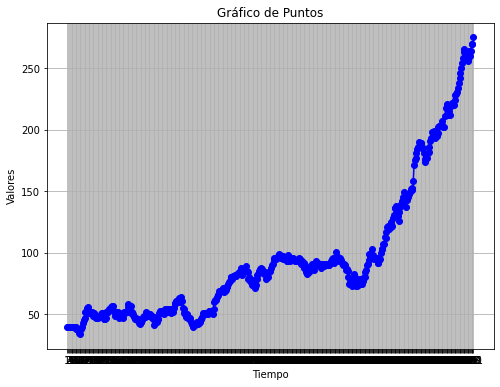

In [5]:

tiempo = list(range(1, len(vivas) + 1))  # Lista de valores del 1 hasta la longitud de vivas

plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)

plt.plot(tiempo, vivas, marker='o', linestyle='-', color='b')  # Gráfico de puntos
plt.xlabel('Tiempo')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Gráfico de Puntos')  # Título del gráfico

plt.grid(True)  # Mostrar cuadrícula en el gráfico (opcional)
plt.xticks(tiempo)  # Mostrar etiquetas en el eje x para cada valor de tiempo

plt.show()  # Mostrar el gráfico